# 🎓 **Taller 2.1: Análisis Exploratorio - Dataset Titanic**
## 📊 Estadísticas Descriptivas Generales, Univariables y Multivariables

## OBJETIVOS DEL TALLER:
* ✅ Obtener estadísticas descriptivas generales del dataset
* ✅ Analizar variables individuales (univariables)
* ✅ Explorar relaciones entre variables (multivariables)
* ✅ Practicar visualizaciones básicas
* ✅ Preparar datos para análisis avanzados

## 📝 INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  MarielenaGonzálezAnalisisExploratorioTitanic.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%)
- ✅ Análisis correcto de estadísticas (30%)
- ✅ Visualizaciones adecuadas (10%)
- ✅ Reporte claro de hallazgos (10%)

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks/Aprendizaje/"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Mounted at /content/drive


# 📁 **LECTURA DEL DATASET**

In [2]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/titanic.csv'
      df = pd.DataFrame(pd.read_csv(path))
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/titanic.csv"
            df = pd.read_csv(url)
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return None

In [3]:
# Cargar dataset
titanic_df = cargar_dataset()

if titanic_df is not None:
    print(f"📊 Dataset cargado: {titanic_df.shape[0]} filas, {titanic_df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(titanic_df.head())
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

✅ Dataset cargado desde URL GitHub
📊 Dataset cargado: 891 filas, 12 columnas
🔍 Primeras filas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 🎯 **EJERCICIO 1: ESTADÍSTICAS DESCRIPTIVAS GENERALES**

In [5]:
def obtener_estadisticas_generales(df):
    estadisticas = {}
    # TODO 1.1: Obtener número total de pasajeros
    estadisticas['total_pasajeros'] = len(df)

    # TODO 1.2: Obtener número de columnas
    estadisticas['total_columnas'] = df.shape[1]

    # TODO 1.3: Obtener tipos de datos únicos
    estadisticas['tipos_datos'] = df.dtypes.unique().tolist()

    # TODO 1.4: Calcular porcentaje de supervivencia general
    estadisticas['tasa_supervivencia'] = df['Survived'].mean()

    return estadisticas

In [7]:
# Ejecutar funciones
print("🔍 Ejecutando análisis general...")
estadisticas = obtener_estadisticas_generales(titanic_df)

# Mostrar resultados
print("\n" + "=" * 40)
print("📈 ESTADÍSTICAS CALCULADAS")
print("=" * 40)
for key, value in estadisticas.items():
    print(f"{key}: {value}")

🔍 Ejecutando análisis general...

📈 ESTADÍSTICAS CALCULADAS
total_pasajeros: 891
total_columnas: 12
tipos_datos: [dtype('int64'), dtype('O'), dtype('float64')]
tasa_supervivencia: 0.3838383838383838


# 📈 **EJERCICIO 2: ANÁLISIS UNIVARIABLE**

In [10]:
def analisis_univariable(df, columna):
    """
    Realiza análisis univariable para una columna específica
    Argumentos:
        df (DataFrame): Dataset
        columna (str): Nombre de la columna a analizar
    Retorna:
        dict: Estadísticas univariables
    """
    stats = {}

    # TODO 2.1: Obtener tipo de dato de la columna
    stats['tipo_dato'] = df[columna].dtype

    if df[columna].dtype in ['int64', 'float64']:
        # Para variables numéricas
        # TODO 2.2: Calcular medidas de tendencia central
        stats['media'] = df[columna].mean()
        stats['mediana'] = df[columna].median()
        stats['moda'] = df[columna].mode().tolist()

        # TODO 2.3: Calcular medidas de dispersión
        stats['desviacion_std'] = df[columna].std()
        stats['rango'] = df[columna].max() - df[columna].min()
        stats['q1'] = df[columna].quantile(0.25)
        stats['q3'] = df[columna].quantile(0.75)
        stats['IQR'] = stats['q3'] - stats['q1']

    else:
        # Para variables categóricas
        # TODO 2.4: Calcular frecuencias
        stats['valores_unicos'] = df[columna].unique().tolist()
        stats['frecuencias'] = df[columna].value_counts().to_dict()
        stats['valor_mas_frecuente'] = df[columna].mode().tolist()

    return stats

In [11]:
def visualizar_univariable(df, columna):
    """
    Crea visualización para análisis univariable
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if df[columna].dtype in ['int64', 'float64']:
        # TODO 2.5: Crear histograma y boxplot para numéricas
        # Histograma
        ax1.hist(df[columna].dropna(), bins=20, alpha=0.7, edgecolor='black')  # ← COMPLETAR
        ax1.set_title(f'Distribución de {columna}')
        ax1.set_xlabel(columna)
        ax1.set_ylabel('Frecuencia')

        # Boxplot
        ax2.boxplot(df[columna].dropna())  # ← COMPLETAR
        ax2.set_title(f'Boxplot de {columna}')
        ax2.set_ylabel(columna)

    else:
        # TODO 2.6: Crear gráfico de barras para categóricas
        counts = df[columna].value_counts()  # ← COMPLETAR
        counts.plot(kind='bar', ax=ax1)
        ax1.set_title(f'Frecuencia de {columna}')
        ax1.set_xlabel(columna)
        ax1.set_ylabel('Frecuencia')
        plt.xticks(rotation=45)

        # Pie chart
        top_categories = counts.head(5)
        ax2.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%')
        ax2.set_title(f'Top 5 categorías - {columna}')

    plt.tight_layout()
    plt.show()

🔍 ANÁLISIS UNIVARIABLE

📊 ANÁLISIS DE: AGE
Estadísticas:
  tipo_dato: float64
  media: 29.69911764705882
  mediana: 28.0
  moda: [24.0]
  desviacion_std: 14.526497332334044
  rango: 79.58
  q1: 20.125
  q3: 38.0
  IQR: 17.875


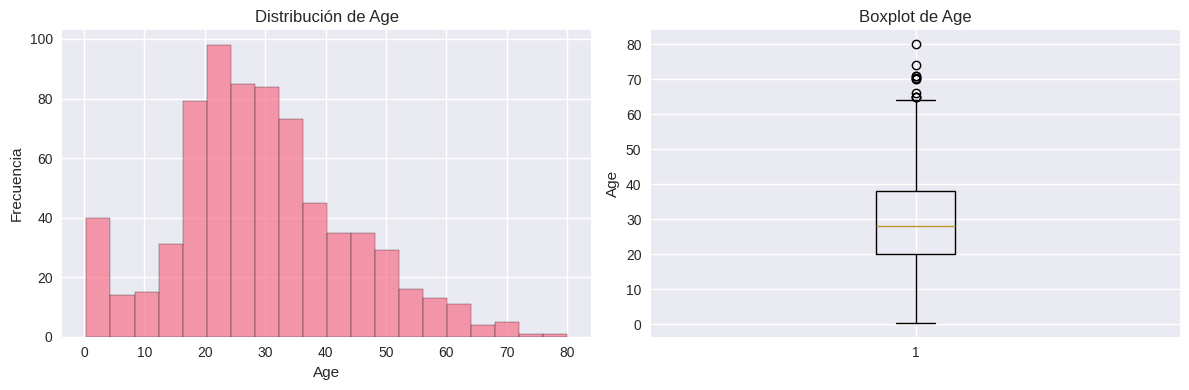


📊 ANÁLISIS DE: FARE
Estadísticas:
  tipo_dato: float64
  media: 32.204207968574636
  mediana: 14.4542
  moda: [8.05]
  desviacion_std: 49.693428597180905
  rango: 512.3292
  q1: 7.9104
  q3: 31.0
  IQR: 23.0896


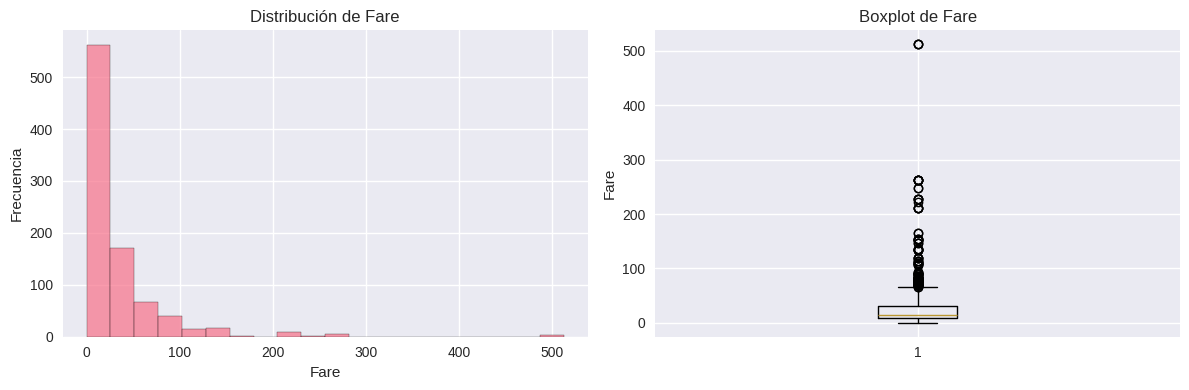


📊 ANÁLISIS DE: SEX
Estadísticas:
  tipo_dato: object
  valores_unicos: ['male', 'female']
  frecuencias: {'male': 577, 'female': 314}
  valor_mas_frecuente: ['male']


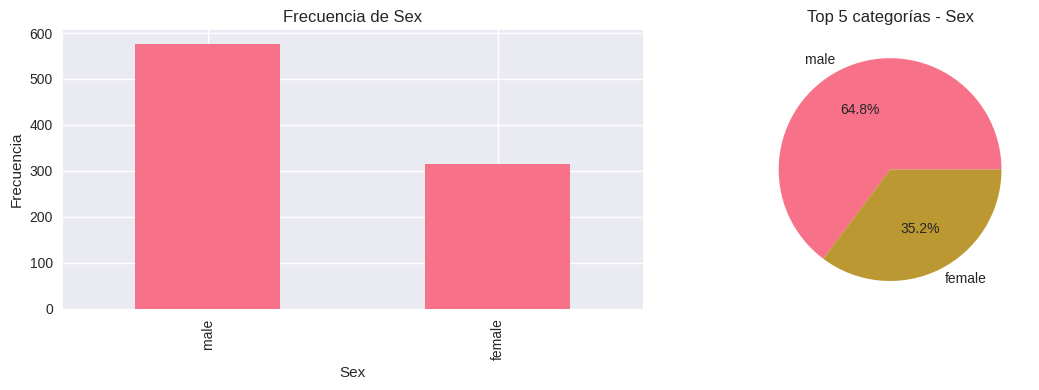


📊 ANÁLISIS DE: PCLASS
Estadísticas:
  tipo_dato: int64
  media: 2.308641975308642
  mediana: 3.0
  moda: [3]
  desviacion_std: 0.8360712409770513
  rango: 2
  q1: 2.0
  q3: 3.0
  IQR: 1.0


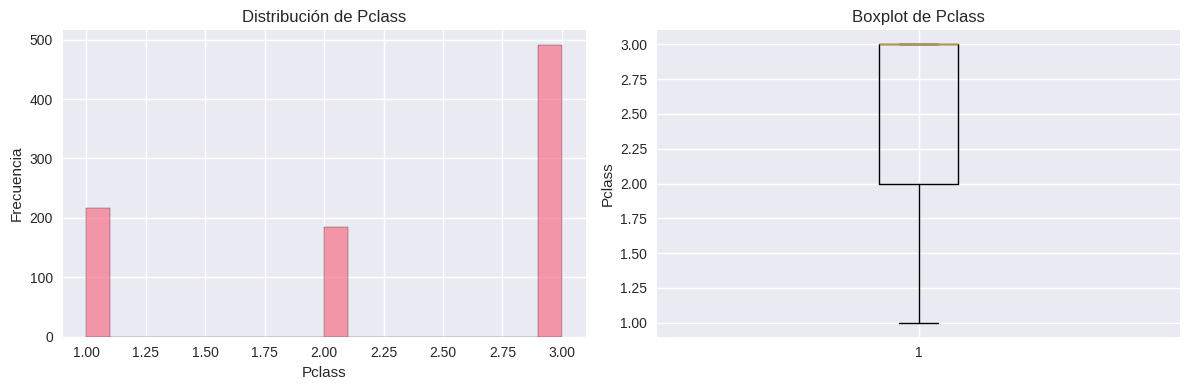

In [14]:
# Análisis para variables específicas
print("🔍 ANÁLISIS UNIVARIABLE")
variables_analizar = ['Age', 'Fare', 'Sex', 'Pclass']

for var in variables_analizar:
    if var in titanic_df.columns:
        print(f"\n" + "="*50)
        print(f"📊 ANÁLISIS DE: {var.upper()}")
        print("="*50)

        stats = analisis_univariable(titanic_df, var)
        print("Estadísticas:")
        for key, value in stats.items():
            print(f"  {key}: {value}")

        visualizar_univariable(titanic_df, var)
    else:
        print(f"❌ Columna '{var}' no encontrada")

# 🔄 **EJERCICIO 3: ANÁLISIS MULTIVARIABLE**

In [16]:
def analisis_multivariable(df):
    """
    Realiza análisis de relaciones entre variables
    """
    print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE")

    # TODO 3.1: Matriz de correlación para variables numéricas
    print("1. MATRIZ DE CORRELACIÓN:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlation_matrix = df[numeric_cols].corr()  # ← COMPLETAR
    print(correlation_matrix)

    # Visualizar matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)  # ← COMPLETAR
    plt.title('Matriz de Correlación - Variables Numéricas')
    plt.show()

    # TODO 3.2: Supervivencia por clase y género
    print("\n2. SUPERVIVENCIA POR CLASE Y GÉNERO:")
    survival_pivot = df.pivot_table(
        values='Survived',
        index='Pclass',
        columns='Sex',
        aggfunc='mean'
    )
    print(survival_pivot)

    # Visualizar
    plt.figure(figsize=(10, 6))
    survival_pivot.plot(kind='bar')
    plt.title('Tasa de Supervivencia por Clase y Género')
    plt.ylabel('Tasa de Supervivencia')
    plt.xlabel('Clase')
    plt.legend(title='Género')
    plt.show()

    # TODO 3.3: Distribución de edad por supervivencia y clase
    print("\n3. DISTRIBUCIÓN DE EDAD POR SUPERVIVENCIA:")
    plt.figure(figsize=(12, 6))

    # Crear subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Boxplot: Edad vs Supervivencia
    df.boxplot(column='Age', by='Survived', ax=axes[0])
    axes[0].set_title('Distribución de Edad por Supervivencia')

    # Violin plot: Edad por clase y supervivencia
    sns.violinplot(x='Pclass', y='Age', hue='Survived',
                   data=df, split=True, ax=axes[1])
    axes[1].set_title('Edad por Clase y Supervivencia')

    plt.tight_layout()
    plt.show()

🔍 INICIANDO ANÁLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACIÓN:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


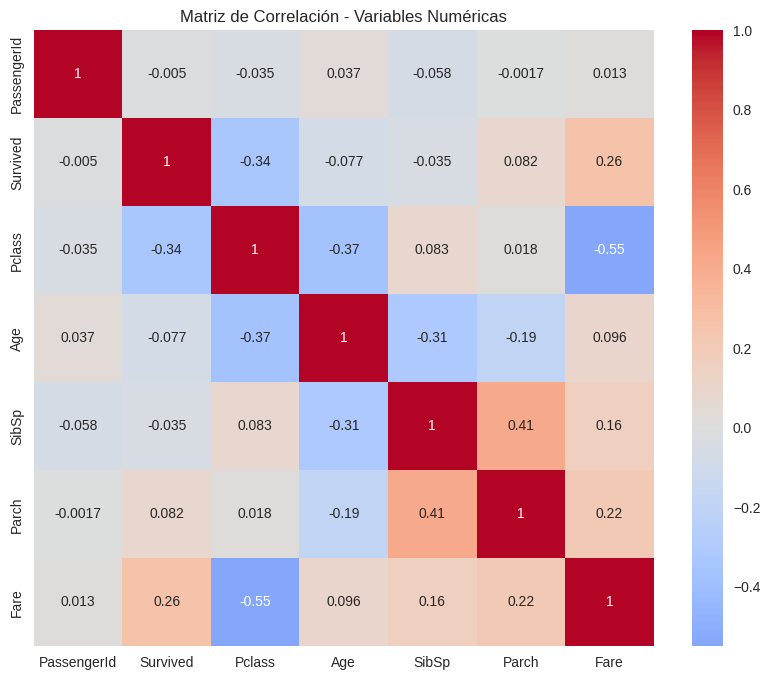


2. SUPERVIVENCIA POR CLASE Y GÉNERO:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


<Figure size 1000x600 with 0 Axes>

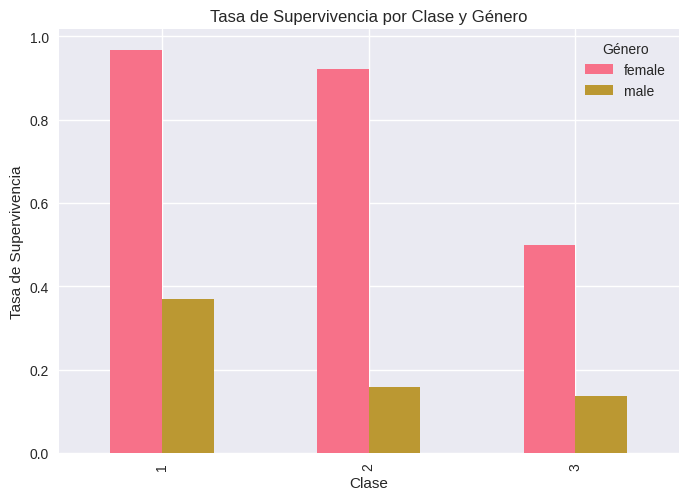


3. DISTRIBUCIÓN DE EDAD POR SUPERVIVENCIA:


<Figure size 1200x600 with 0 Axes>

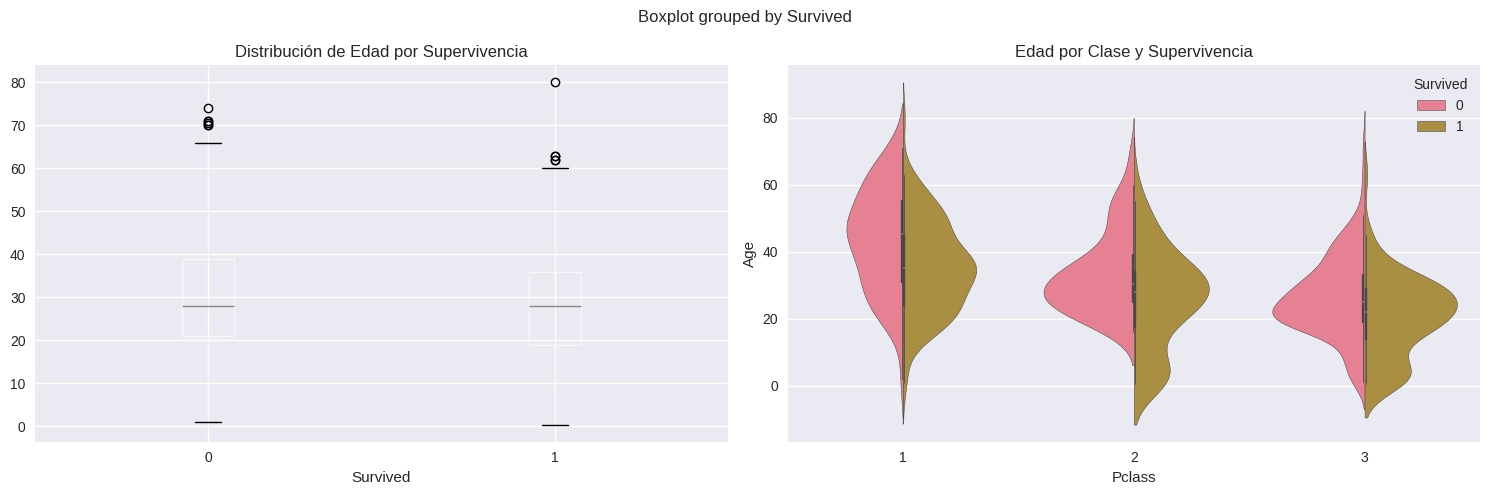

In [17]:
# Ejecutar análisis multivariable
analisis_multivariable(titanic_df)

# ✅ **EJERCICIO 4: REPORTE FINAL - CONCLUSIONES**

In [18]:
def generar_reporte_final():
    """
    Genera un reporte final con los hallazgos principales
    """
    print("📋 GENERANDO REPORTE FINAL")
    print("=" * 60)

    # Hallazgos principales
    print("🎯 HALLAZGOS PRINCIPALES:")
    print(f"1. Total de pasajeros: {len(titanic_df)}")
    print(f"2. Tasa general de supervivencia: {titanic_df['Survived'].mean():.2%}")
    print(f"3. Edad promedio: {titanic_df['Age'].mean():.1f} años")
    print(f"4. Tarifa promedio: ${titanic_df['Fare'].mean():.2f}")

    # Análisis por género
    survival_by_sex = titanic_df.groupby('Sex')['Survived'].mean()
    print(f"5. Supervivencia por género:")
    for sex, rate in survival_by_sex.items():
        print(f"   - {sex}: {rate:.2%}")

    # Análisis por clase
    survival_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
    print(f"6. Supervivencia por clase:")
    for pclass, rate in survival_by_class.items():
        print(f"   - Clase {pclass}: {rate:.2%}")

In [19]:
# Generar reporte
generar_reporte_final()

📋 GENERANDO REPORTE FINAL
🎯 HALLAZGOS PRINCIPALES:
1. Total de pasajeros: 891
2. Tasa general de supervivencia: 38.38%
3. Edad promedio: 29.7 años
4. Tarifa promedio: $32.20
5. Supervivencia por género:
   - female: 74.20%
   - male: 18.89%
6. Supervivencia por clase:
   - Clase 1: 62.96%
   - Clase 2: 47.28%
   - Clase 3: 24.24%


* Las visualizaciones de la distribución de edad por supervivencia y clase sugieren que la edad pudo haber sido un factor importante en la supervivencia, con una mayor tasa de supervivencia entre los pasajeros más jóvenes, especialmente en las clases inferiores. Esto podría estar relacionado con la implementación del protocolo "mujeres y niños primero".

* La matriz de correlación confirmó una relación inversa entre la clase del pasajero ('Pclass') y la tarifa pagada ('Fare'). Esto subraya que la clase era un indicador directo del estatus socioeconómico y, como se vio en la supervivencia por clase, un factor crucial en la probabilidad de sobrevivir.

* La correlación positiva entre el número de hermanos/cónyuges ('SibSp') y padres/hijos ('Parch') sugiere que muchos pasajeros viajaban en grupos familiares. Aunque este análisis no profundizó en cómo el tamaño o la composición familiar afectó la supervivencia, es una observación importante para futuros análisis.


# 🚀 ¡TALLER FINALIZADO!"